In [1]:
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import os
import pandas as pd

In [2]:
os.getcwd()

'c:\\Users\\Pascal\\OneDrive\\Documents\\Data_S'

In [3]:
df = pd.read_csv(r"C:\Users\Pascal\OneDrive\Documents\Data_S\EDA_proj\rand_data.csv")

In [4]:
df.head()

,x,y,z
0,271.972705,404.856458,b
1,270.695379,398.643623,b
2,233.655931,384.055761,b
3,264.084236,430.626036,b
4,303.503692,353.905637,b


Split dataset - df - into training set and test set for model. This could be done before or after preprocessing though.

In [58]:
# split using sklearn
from sklearn.model_selection import train_test_split 
inputs, testinputs, target, testtarget = train_test_split(df.drop('z', axis = 1), df['z'], test_size = 0.4)


In [7]:
#split manually

#df1 = df.iloc[:300]
#df2 = df.iloc[301:]
#
#inputs = df1.drop('z', axis=1)
#target = df1['z']
#testinputs = df2.drop('z', axis=1)
#testtarget = df2['z']

Preprocessing (quantile_transform and StandardScaler) & Visualizing data

Text(0.5, 1.0, 'Original datapoints')

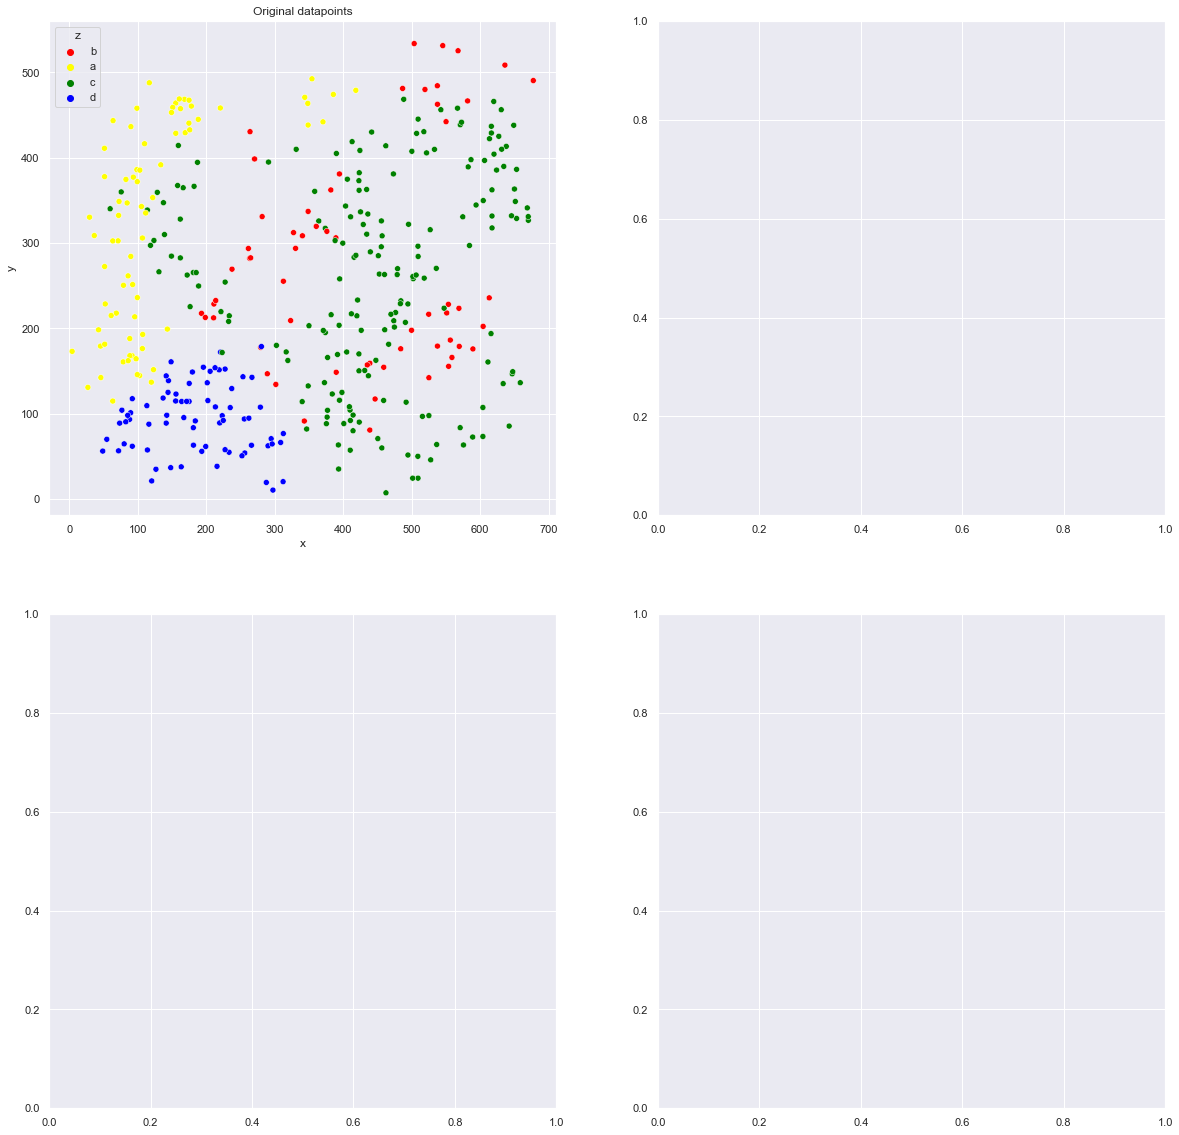

In [78]:
sn.set()
fig1, data_before = plt.subplots(2,2, sharex= False, sharey= False, figsize = (20,20))
# set a color scheme to prevent inconsistent color mapping in subplots
color_shceme = dict({'a':'yellow', 'b':'red', 'c':'green', 'd':'blue'})
sn.scatterplot(ax = data_before[0,0], x = inputs['x'], y= inputs['y'], hue= target, palette= color_shceme).set_title('Original datapoints')

In [100]:
from sklearn.preprocessing import quantile_transform
new_inputs = pd.DataFrame(quantile_transform(inputs, n_quantiles= 100), columns= ['x', 'y'])
new_testinputs = pd.DataFrame(quantile_transform(testinputs, n_quantiles= 100,), columns= ['x', 'y'])

In [101]:
new_testinputs

,x,y
0,0.802671,0.636364
1,0.137656,0.377683
2,0.778715,0.811465
3,0.545416,0.991539
4,0.391658,0.520820
...,...,...
260,0.212121,0.594458
261,0.523670,0.239315
262,0.633346,0.303915
263,0.586198,0.746743


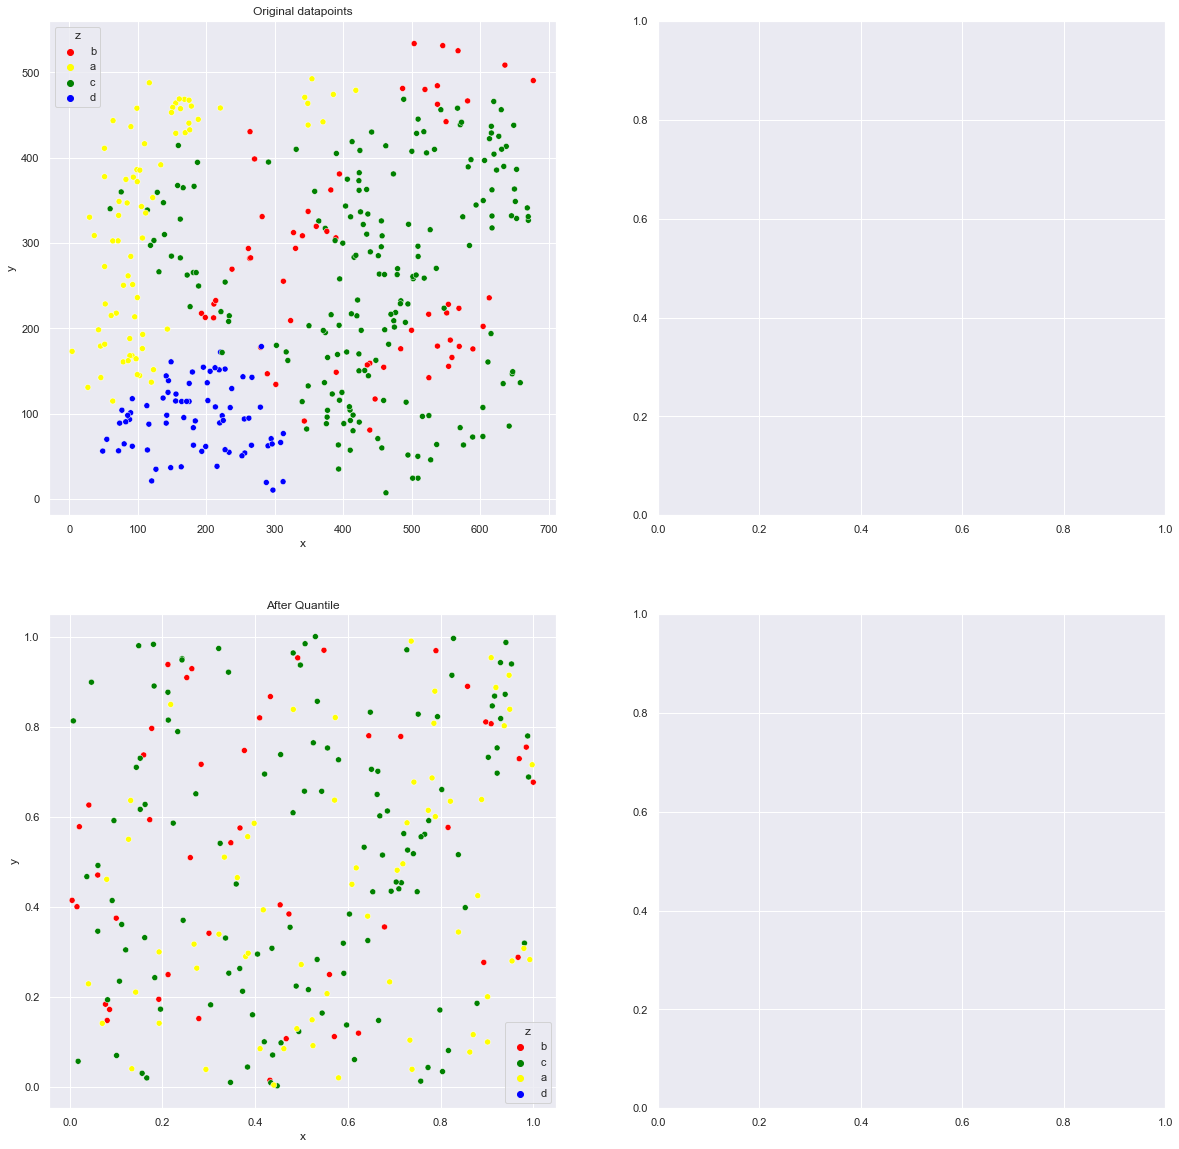

In [79]:
sn.scatterplot(ax = data_before[1,0], x = new_inputs['x'], y= new_inputs['y'], hue= target, palette= color_shceme).set_title('After Quantile')
fig1

In [99]:
from sklearn.preprocessing import StandardScaler
new_inputs2 = pd.DataFrame(StandardScaler().fit_transform(inputs), columns= ['x', 'y'])
new_testinputs2 = pd.DataFrame(StandardScaler().fit_transform(testinputs), columns= ['x', 'y'])

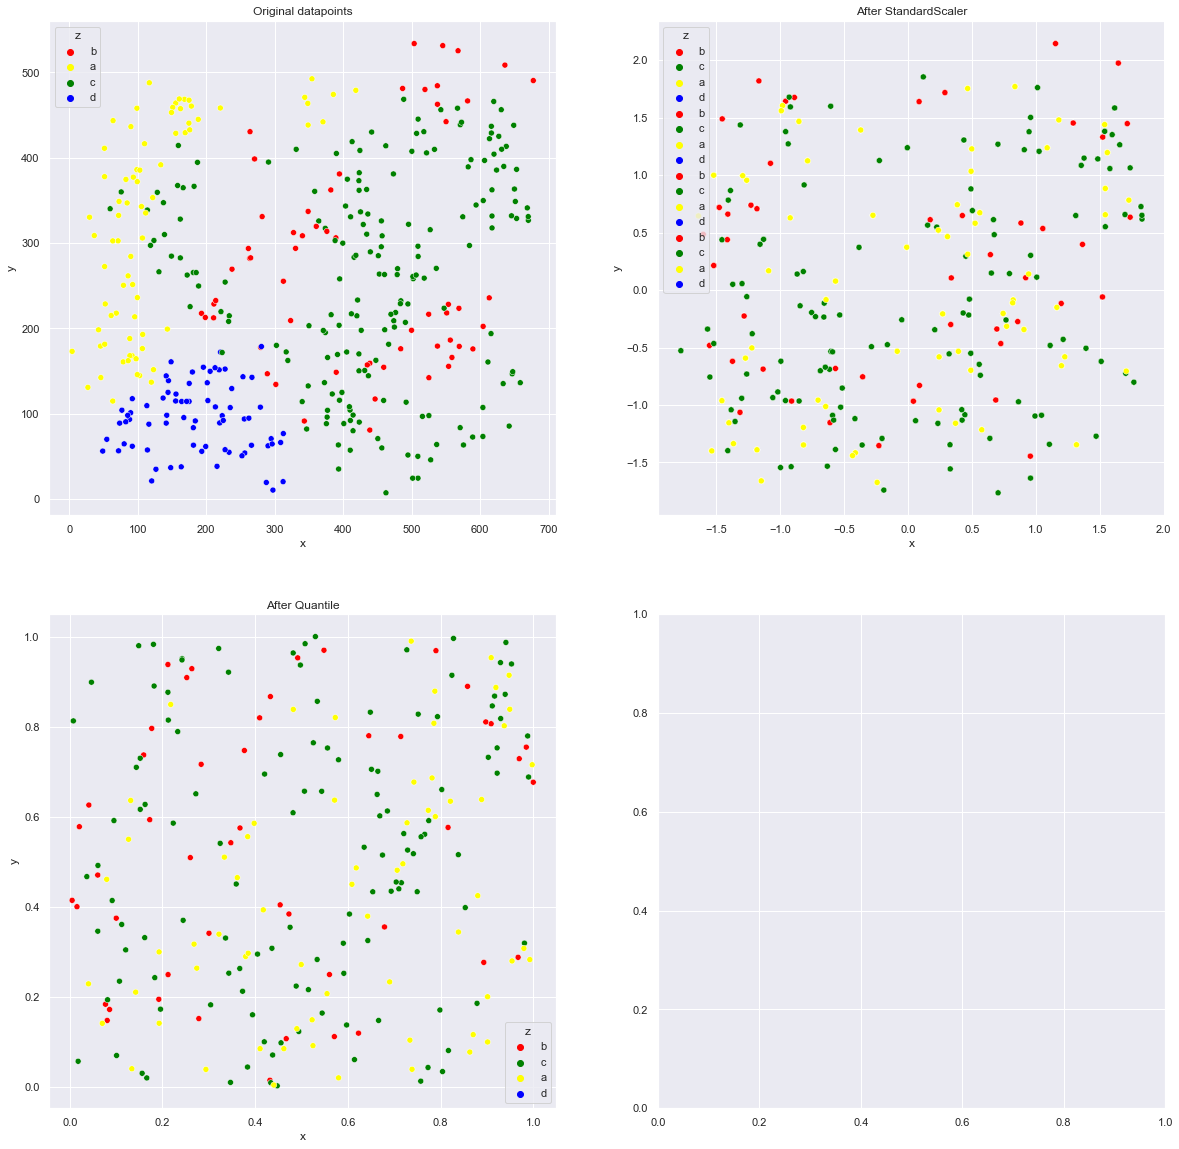

In [84]:
sn.scatterplot(x= new_inputs2['x'], y= new_inputs2['y'], hue= target, palette= color_shceme, ax= data_before[0,1],legend=False).set_title('After StandardScaler')
fig1

Training the model

In [146]:
#Directly training the algorithm

from sklearn import tree
model = tree.DecisionTreeClassifier()
neutral_model = model.fit(inputs, target)
quatile_model = model.fit(new_inputs, target)
standardized_model = model.fit(new_inputs2, target)

In [147]:
#Creating & Training pipelines
from sklearn.pipeline import Pipeline
neutral_pipe = Pipeline([("direct_algo",tree.DecisionTreeClassifier())])
neutral_pipe.fit(inputs,target)
standardized_pipe = Pipeline([("Standardization", StandardScaler()), ("algo", tree.DecisionTreeClassifier())])
standardized_pipe.fit(inputs,target)
#quantile_pipe = Pipeline([("QuantileTrans", quantile_transform(inputs, n_quantiles= 100)), ("algo", tree.DecisionTreeClassifier())])

Pipeline(steps=[('Standardization', StandardScaler()),
                ('algo', DecisionTreeClassifier())])

In [148]:
Neutral_model = neutral_model.score(testinputs, testtarget)

In [149]:
Neutral_pipe = neutral_pipe.score(testinputs,testtarget)

In [150]:
Standardized_model = standardized_model.score(new_testinputs2, testtarget)

In [151]:
Standardized_pipe = standardized_pipe.score(testinputs,testtarget)

In [152]:
Quatile_model = quatile_model.score(new_testinputs, testtarget)

In [161]:
ls = [Neutral_model, Neutral_pipe, Standardized_model, Standardized_pipe, Quatile_model]

In [168]:
compare = dict({})
compare['Neutral_model',' Neutral_pipe', 'Standardized_model', 'Standardized_pipe', 'Quatile_model'] = ls

<AxesSubplot:>

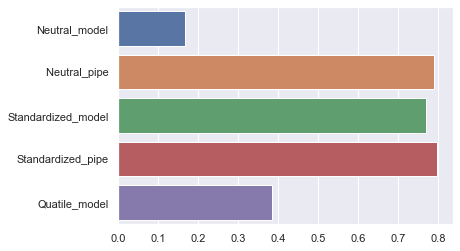

In [183]:
sn.barplot(y = ['Neutral_model',' Neutral_pipe', 'Standardized_model', 'Standardized_pipe', 'Quatile_model'], x= ls, orient= 'horizontal')

<h3> To Do </h3>
-Combined scatterplots for predictions and test result with datasets (preds and testinputs). Differentiating them with the "style" attribute on scatter plot